# Winwin, Graded Challenge 2

# Import code

In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

# Preprocess Data

In [2]:
missing_values =  ["NaN"]
df = pd.read_csv('weatherAUS.csv', na_values = missing_values)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [5]:
print(df.shape)

(145460, 23)


In [6]:
df = df.drop(columns = ['Evaporation', 'Sunshine'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Filling the missing values

Saya menfill nan values dengan nilai 0 karena jika hanya melakukan removes nan banyak data yang akan terbuang

In [7]:
df = df.replace(np.nan, '0', regex=True)
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
print(df.shape)

(145460, 21)


In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44,W,WNW,20,...,71,22,1007.7,1007.1,8,0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0,WNW,44,NNW,WSW,4,...,44,25,1010.6,1007.8,0,0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0,WSW,46,W,WSW,19,...,38,30,1007.6,1008.7,0,2,21,23.2,No,No
3,2008-12-04,Albury,9.2,28,0,NE,24,SE,E,11,...,45,16,1017.6,1012.8,0,0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1,W,41,ENE,NW,7,...,82,33,1010.8,1006,7,8,17.8,29.7,No,No


For this model, I want know the today is rain or not using some features

# Data Transform

In [10]:
col_edit = df['RainToday']
col_edit = col_edit.apply(lambda x:1 if x =='Yes' else x)
col_edit = col_edit.apply(lambda x:0 if x =='No' else x)
col_edit = col_edit.fillna(0)

In [11]:
new_rain = pd.get_dummies(df['RainToday'].fillna('never'))

In [12]:
df_new = pd.concat([df,new_rain],axis=1)

In [13]:
df_new.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,0,No,Yes
0,2008-12-01,Albury,13.4,22.9,0.6,W,44,W,WNW,20,...,1007.1,8,0,16.9,21.8,No,No,0,1,0
1,2008-12-02,Albury,7.4,25.1,0,WNW,44,NNW,WSW,4,...,1007.8,0,0,17.2,24.3,No,No,0,1,0
2,2008-12-03,Albury,12.9,25.7,0,WSW,46,W,WSW,19,...,1008.7,0,2,21,23.2,No,No,0,1,0
3,2008-12-04,Albury,9.2,28,0,NE,24,SE,E,11,...,1012.8,0,0,18.1,26.5,No,No,0,1,0
4,2008-12-05,Albury,17.5,32.3,1,W,41,ENE,NW,7,...,1006,7,8,17.8,29.7,No,No,0,1,0


In [14]:
df_new = df
df_new['rain_today']=col_edit

In [15]:
df_new.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,rain_today
0,2008-12-01,Albury,13.4,22.9,0.6,W,44,W,WNW,20,...,22,1007.7,1007.1,8,0,16.9,21.8,No,No,0
1,2008-12-02,Albury,7.4,25.1,0,WNW,44,NNW,WSW,4,...,25,1010.6,1007.8,0,0,17.2,24.3,No,No,0
2,2008-12-03,Albury,12.9,25.7,0,WSW,46,W,WSW,19,...,30,1007.6,1008.7,0,2,21,23.2,No,No,0
3,2008-12-04,Albury,9.2,28,0,NE,24,SE,E,11,...,16,1017.6,1012.8,0,0,18.1,26.5,No,No,0
4,2008-12-05,Albury,17.5,32.3,1,W,41,ENE,NW,7,...,33,1010.8,1006,7,8,17.8,29.7,No,No,0


In [16]:
re_cols =['rain_today','MinTemp', 'MaxTemp']
df_new1 = df[re_cols]
df_new1.head()

,rain_today,MinTemp,MaxTemp
0,0,13.4,22.9
1,0,7.4,25.1
2,0,12.9,25.7
3,0,9.2,28
4,0,17.5,32.3


In [17]:
df_new1 = df_new1.astype('float')

Use Min & Max Temperature

In [18]:
temp_clm = ['MinTemp','MaxTemp']
X = df_new1[temp_clm]
y = df_new1['rain_today']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)

In [20]:
X_train.shape

(116368, 2)

In [21]:
X_val.shape

(29092, 2)

# Modeling

Scaling data

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train) 

In [23]:
X_train_trf

array([[-1.86191045, -3.11080327],
       [-1.21371201, -0.36842952],
       [-0.36488072, -0.27386491],
       ...,
       [-1.44521146, -1.11143719],
       [ 0.93151616,  0.98249351],
       [-1.44521146, -0.93581719]])

# Create model and train

Untuk model saya akan membandingkan model logistic regression & SVC yang mengunakan kernel linear & RBF untuk melihat pengaruh kernel tersebut pada akurasi dibanding tanpa kernel (linear). Dan pada kernel RBF saya akan menggunakan nilai C = 1 untuk mengetahui efek gap dari nilai C tersebut terhadap akurasi yang diperoleh.

Logistic Regression

In [24]:
model_lr = LogisticRegression(solver="lbfgs", random_state=69)
%time model_lr.fit(X_train_trf, y_train)

Wall time: 113 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=69, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

SVM, kernal linear

In [25]:
from sklearn.svm import SVC
model_svc_linear = SVC(kernel='linear', random_state=69,C=1)
%time model_svc_linear.fit(X_train_trf, y_train)

Wall time: 1min 44s


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=69,
    shrinking=True, tol=0.001, verbose=False)

SVC, kernel RBF, C=1

In [26]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', random_state=69,C=1)
%time model_svc.fit(X_train_trf, y_train)

Wall time: 7min 56s


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=69,
    shrinking=True, tol=0.001, verbose=False)

Dari waktu komputasi logistic regression adalah yang paling tercepat, sedangkan model SVC dengan kernel RBF adalah yang paling lama

# Model Analysis

Performance Evaluation

In [27]:
X_val_trf = scaler.transform(X_val) 

Logistic Regression

In [28]:
%time y_val_predict = model_lr.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 1.96 ms
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87     22539
         1.0       0.51      0.13      0.21      6553

    accuracy                           0.78     29092
   macro avg       0.65      0.55      0.54     29092
weighted avg       0.73      0.78      0.72     29092



SVM, kernal linear

In [29]:
%time y_val_predict = model_svc_linear.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 10.8 s
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     22539
         1.0       0.00      0.00      0.00      6553

    accuracy                           0.77     29092
   macro avg       0.39      0.50      0.44     29092
weighted avg       0.60      0.77      0.68     29092



D:\program 2\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC, kernel RBF, C=1

In [30]:
%time y_val_predict = model_svc.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

Wall time: 25.9 s
              precision    recall  f1-score   support

         0.0       0.79      0.98      0.88     22539
         1.0       0.64      0.12      0.21      6553

    accuracy                           0.79     29092
   macro avg       0.71      0.55      0.54     29092
weighted avg       0.76      0.79      0.73     29092



Untuk hasil akurasi model SVC, kernel RBF C=1 adalah yang terbaik dan yang terendah adalah model logistic regression. Namun hasil akurasi msh dapat ditingkatkan dengan melalukan prespocesing data atau mengganti parameter model.

# ROC curve

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve,auc

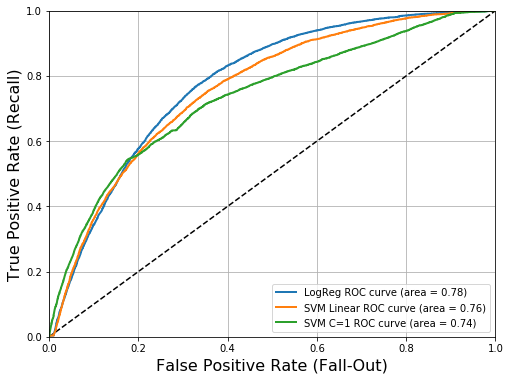

In [34]:
plt.figure(figsize=(8, 6))                                    # Not shown
plt.axis([0, 1, 0, 1])                                    # Not shown in the book
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
plt.grid(True)                                            # Not shown
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['LogReg','SVM Linear','SVM C=1']
for idx,model in enumerate([model_lr,model_svc_linear,model_svc]):
    y_scores = model.decision_function(X_val_trf)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

Bisa kita lihat dari grafik ROC, untuk logistic regression, SVM Linear dan SVM C=1 memiliki trend recall yang baik/ normal namun logistic regression memiliki nilai yang paling baik.

# Confusion Matrix

Logistic Regression

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
y_val_pred = model_lr.predict(X_val_trf)
cm = confusion_matrix(y_val, y_val_pred)
print(cm)
print(precision_score(y_val, y_val_pred))
print(recall_score(y_val, y_val_pred))

[[21674   865]
 [ 5669   884]]
0.505431675242996
0.13490004578055853


SVM, kernal linear

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
y_val_pred = model_svc_linear.predict(X_val_trf)
cm = confusion_matrix(y_val, y_val_pred)
print(cm)
print(precision_score(y_val, y_val_pred))
print(recall_score(y_val, y_val_pred))

[[22539     0]
 [ 6553     0]]
0.0
0.0


D:\program 2\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC, kernel RBF, C=1

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
y_val_pred = model_svc.predict(X_val_trf)
cm = confusion_matrix(y_val, y_val_pred)
print(cm)
print(precision_score(y_val, y_val_pred))
print(recall_score(y_val, y_val_pred))

[[22080   459]
 [ 5751   802]]
0.6360031720856463
0.12238669311765603


Untuk hasil confusion matrix untuk recall semua model lebih memprediksi hujan (1) pada model logistic regression dan SVM, kernel RBF C=1. Namun untuk model SVM kernel linear, model ini mengklasifikasikan benar" hujan.